<a href="https://colab.research.google.com/github/lvysher/cnn-image-classification/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/My Drive/image classification/data"
train_dir = f"{data_dir}/train"
test_dir = f"{data_dir}/test"

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [ ]:
import tensorflow as tf

img_height, img_width = 150, 150
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)
class_names = train_ds.class_names
print("Class 0 is:", class_names[0])
print("Class 1 is:", class_names[1])


Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.
Class 0 is: cats
Class 1 is: dogs


In [ ]:
import numpy as np

X_train = []
Y_train = []

for images, labels in train_ds:
    X_train.append(images.numpy())
    Y_train.append(labels.numpy())

X_train = np.concatenate(X_train)
Y_train = np.concatenate(Y_train)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)

Shape of X_train: (557, 150, 150, 3)
Shape of Y_train: (557, 1)


In [ ]:
X_test = []
Y_test = []

for images, labels in test_ds:
    X_test.append(images.numpy())
    Y_test.append(labels.numpy())

X_test = np.concatenate(X_test)
Y_test = np.concatenate(Y_test)

print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_test: (140, 150, 150, 3)
Shape of Y_test: (140, 1)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

MODEL

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train, epochs = 25, batch_size = 64)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5028 - loss: 0.7391
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5205 - loss: 0.6909
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.5313 - loss: 0.6934
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5306 - loss: 0.6909
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5462 - loss: 0.6899
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.5185 - loss: 0.6885
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5862 - loss: 0.6801
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.5642 - loss: 0.6840
Epoch 9/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6067 - loss: 0.6584
Epoch 10/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.5378 - loss: 0.6979
Epoch 11/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.6987 - loss: 0.6328
Epoch 12/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6907 - loss: 0.5914
Epoch 13/25
9

In [ ]:
model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.5859 - loss: 1.3240


[1.3637582063674927, 0.6000000238418579]

In [ ]:
idx = random.randint(0, len(X_test) - 1)
img = X_test[idx]

print("Image shape:", img.shape)
print("Data type:", img.dtype)
print("Pixel range:", np.min(img), "to", np.max(img))

Image shape: (150, 150, 3)
Data type: float32
Pixel range: 0.0 to 1.0


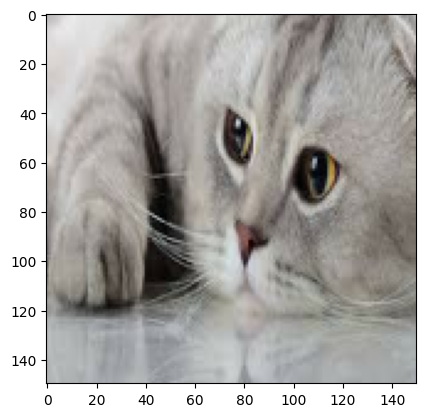

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

PREDICTING

In [ ]:
loss, acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {acc:.2%}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.5859 - loss: 1.3240
Test Accuracy: 60.00%


In [ ]:
!pip install -q gradio

In [ ]:
import gradio as gr
from PIL import Image
import numpy as np

# Prediction function
def predict_cat_dog(img):
    img = img.convert("RGB")
    img = img.resize((150, 150))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 150, 150, 3)

    y_pred = model.predict(img_array)
    label = 'Cat 🐱' if y_pred[0][0] < 0.5 else 'Dog 🐶'
    confidence = f"{y_pred[0][0]:.2f}"

    return f"Prediction: {label}\nConfidence: {confidence}"

In [ ]:
interface = gr.Interface(
    fn=predict_cat_dog,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🐾 Cat vs Dog Classifier",
    description="Upload an image of a cat or dog and see what the model thinks!"
)

In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bbd5a03fda6888b34a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
